# 데이터 준비
총 세 가지 경사 하강법 기법을 살펴볼건데,<br>
선형 회귀를 기준으로 설명할 것이기 때문에<br>
랜덤으로 선형처럼 보이는 데이터를 생성하겠습니다.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

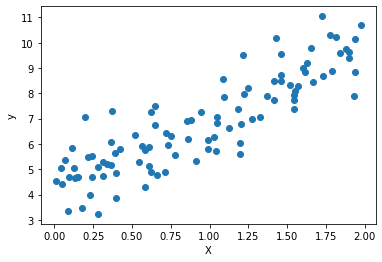

In [3]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.

In [5]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

# 확률적 경사 하강법

In [6]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

In [7]:
def learning_schedule(t):
    return t0 / (t + t1)

In [8]:
theta = np.random.randn(2, 1)  # 무작위 초기화

In [9]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [10]:
theta

array([[4.18475289],
       [2.73036719]])

배치 경사 하강법 코드는 전체 훈련 세트에 대해 1000번 반복했는데<br>
이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했습니다.

# 미니배치 경사 하강법

In [11]:
n_iterations = 50
minibatch_size = 20

In [12]:
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [13]:
theta = np.random.randn(2,1)  # 랜덤 초기화

In [14]:
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients


In [15]:
theta

array([[4.23851339],
       [2.79904296]])